something


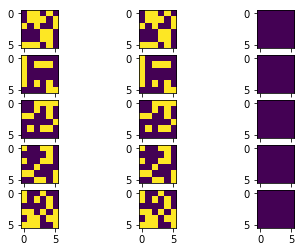

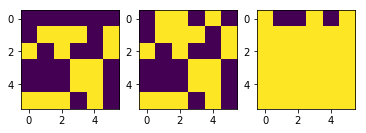

In [2]:
import numpy as np
import matplotlib.pyplot as p
import random
import copy

N = 5 # global variable; change this and global rand value to true if you want to specify size of input pattern
rand = False # change this to true if you want

"""
get_num_inputs determines number of input patterns to produce based on random n value 
            - if you want to change this, make rand false and change N value above to desired number
"""
def get_num_inputs(rand = True): # change this to true if you want to define a specific size
    if (rand):
        n = random.randrange(3,8) # dont want too many input patterns crowding screen
    else:
        n = N
    num_patterns = int(0.15*n*n) # read while doing research on hopfield on spurious minima
    return [num_patterns, n]

"""
random_inputs generates random input patterns
        -- note that this actually produces [0,1] patterns that will be changed to [-1, 1] patterns
"""
def random_inputs(num_inputs):
    inputs = []
    for x in range(num_inputs[0]):
        inputs.append(np.random.randint(2, size = (num_inputs[1],num_inputs[1])))
    return inputs

"""
compute_weight computes the weight based on the input patterns given
"""
def compute_weight(inputs, n):
    wt = np.zeros([n*n,n*n])
    for e in inputs:
        wt += np.outer(e,e)
    np.fill_diagonal(wt, 0)
    wt = wt/len(inputs)
    return wt

"""
async_update updates the input matrix based on the weights to the output matrix
"""
def async_update(*, num_loop = 100, threshold = 0, wt, one_input, n):
    for x in range(num_loop):
        one_input = np.dot(one_input,wt)
        for e in np.nditer(one_input, op_flags=["readwrite"]):
            e[...] = 1 if e > 0 else -1
    return one_input

"""
flatten_inputs flattens 2-d input to 1-d array and converts [0,1] array to [-1, 1] array
"""
def flatten_inputs(inputs):
    for i,e in enumerate(inputs):
        inputs[i] = e.flatten()
        inputs[i] = np.where(inputs[i]==0, -1, inputs[i])
    return inputs

"""
generate_hop_network is the main function that generates the hopfield network with weights
"""
def generate_hop_network():
    num = get_num_inputs()
    ins = random_inputs(num)
    flat_ins = ins
    flat_ins = flatten_inputs(flat_ins)
    flat_ins = copy.deepcopy(ins)
    for i,e in enumerate(ins):
        ins[i] = e.reshape(num[1],num[1])
    wt = compute_weight(flat_ins, num[1])
    outs = []
    for e in flat_ins:
        outs.append(async_update(wt = wt, one_input = e, n = num[1]))
    for i,e in enumerate(outs):
        outs[i] = e.reshape(num[1],num[1])
    return [ins, outs, wt, num]

"""
hopPlot plots the hopfield network
"""
def hopPlot(*, pltcntr = 1, ins, outs): 
    r = len(ins)
    c = 3
    for i in range(r):
        p.subplot(r,3,pltcntr)
        p.imshow(ins[i])
        p.subplot(r,3,(pltcntr+1))
        p.imshow(outs[i])
        # not sure what this third plot is for?? (showing noise?)
        p.subplot(r,3,(pltcntr+2))
        p.imshow(ins[i]-outs[i])
        pltcntr = pltcntr+3
    return(p)

"""
generate_noise changes 2 bits of the input pattern given to generate noisy pattern
"""
def generate_noise(one_input):
    count = 0
    for e in np.nditer(one_input, op_flags=["readwrite"]):
        if (e == 1 and count < 3):
            e[...] = e*-1
            count += 1

"""
noise_output generates noisy graph 
"""
def noise_output(one_input, wt, n, num):
    generate_noise(one_input)
    noise_ins = flatten_inputs([one_input])
    noise_outs = []
    noise_outs.append(async_update(wt = wt, one_input = noise_ins[0], n = n))
    noise_ins = [noise_ins[0].reshape(n,n)]
    noise_outs = [noise_outs[0].reshape(n,n)]
    p.figure()
    p.title('Plot with noise in input')
    hopPlot(ins = noise_ins, outs = noise_outs)

def main():
    ins_outs = generate_hop_network()
    hopPlot(ins = ins_outs[0], outs = ins_outs[1])
    noise_output(one_input = ins_outs[0][0], wt = ins_outs[2], n = ins_outs[3][1], num = ins_outs[3][0])
    
main()